In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [5]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
x, y = np.random.multivariate_normal(mean, cov, 1000).T

e:\a-soft\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
e:\a-soft\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


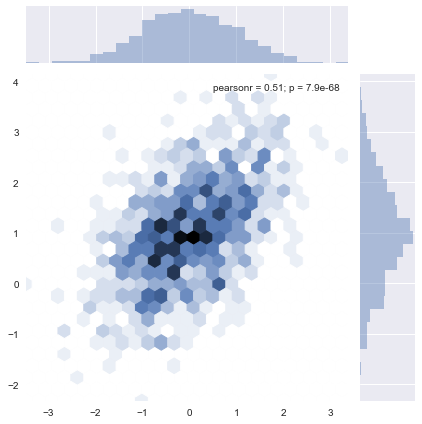

In [14]:
sns.jointplot(x = x, y = y, kind="hex");

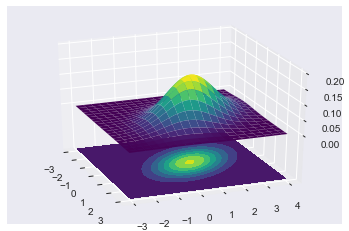

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 1.])
Sigma = np.array([[ 1. , -0.5], [-0.5,  1.5]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()

In [21]:
X = np.arange(-3, 3, 0.1)  
Y = np.arange(-3, 3, 0.1)  
X, Y = np.meshgrid(X, Y)
Z = X + Y

In [20]:
X

array([-3.        , -2.89830508, -2.79661017, -2.69491525, -2.59322034,
       -2.49152542, -2.38983051, -2.28813559, -2.18644068, -2.08474576,
       -1.98305085, -1.88135593, -1.77966102, -1.6779661 , -1.57627119,
       -1.47457627, -1.37288136, -1.27118644, -1.16949153, -1.06779661,
       -0.96610169, -0.86440678, -0.76271186, -0.66101695, -0.55932203,
       -0.45762712, -0.3559322 , -0.25423729, -0.15254237, -0.05084746,
        0.05084746,  0.15254237,  0.25423729,  0.3559322 ,  0.45762712,
        0.55932203,  0.66101695,  0.76271186,  0.86440678,  0.96610169,
        1.06779661,  1.16949153,  1.27118644,  1.37288136,  1.47457627,
        1.57627119,  1.6779661 ,  1.77966102,  1.88135593,  1.98305085,
        2.08474576,  2.18644068,  2.28813559,  2.38983051,  2.49152542,
        2.59322034,  2.69491525,  2.79661017,  2.89830508,  3.        ])